In [13]:
pip install openpyxl

     |████████████████████████████████| 251 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [53]:
import allensdk
# from allensdk import brain_observatory
import scipy
from allensdk.brain_observatory import gaze_mapping
import pandas as pd
import os

In [32]:
#Function to convert windoes paths into wsl path:
import re

def manual_windows_to_wsl(win_path):
    """Convert Windows path (drive letter or UNC) to a WSL path with custom network mapping."""
    
    # Handle UNC paths (\\sil3\data\...)
    if win_path.startswith("\\\\"):
        path = win_path.lstrip("\\")  # Remove leading backslashes
        path = path.replace("\\", "/")  # Convert backslashes to forward slashes
        
        # Check if it's sil3 or sil1 and adjust the mapping
        if "sil3" in path:
            path = path.replace("sil3", "w")
        elif "sil1" in path:
            path = path.replace("sil1", "y")
        
        return f"/mnt/{path}"  # Directly map UNC paths to /mnt/w/... or /mnt/y/...

    # Handle standard Windows paths with drive letters (C:\...)
    match = re.match(r"([A-Za-z]):\\(.+)", win_path)
    if not match:
        raise ValueError(f"Invalid Windows path format: {win_path}")
    
    drive, path = match.groups()
    path = path.replace("\\", "/")  # Convert backslashes to forward slashes
    return f"/mnt/{drive.lower()}/{path}"

# Example Usage
network_path_sil3 = r"\\sil3\data\Large_scale_mapping_NP\lizards\PV97\PV97_Experiment_21_01_25\Videos"
network_path_sil1 = r"\\sil1\data\Large_scale_mapping_NP\lizards\PV97\PV97_Experiment_21_01_25\Videos"

# Convert UNC paths
converted_sil3 = manual_windows_to_wsl(network_path_sil3)
converted_sil1 = manual_windows_to_wsl(network_path_sil1)

print(converted_sil3)  # Output: /mnt/w/data/Large_scale_mapping_NP/lizards/PV97/PV97_Experiment_21_01_25/Videos
print(converted_sil1)  # Output: /mnt/y/data/Large_scale_mapping_NP/lizards/PV97/PV97_Experiment_21_01_25/Videos







/mnt/w/data/Large_scale_mapping_NP/lizards/PV97/PV97_Experiment_21_01_25/Videos
/mnt/y/data/Large_scale_mapping_NP/lizards/PV97/PV97_Experiment_21_01_25/Videos


In [5]:
Data = pd.read_excel(r'/mnt/d/Mark_S13/Documents/GitHub/NeuroPix_Vstim_Analysis/Experiment_Excel.xlsx', engine='openpyxl') # Specify the engine explicitly
Data.iloc[53]

Animal_ID                                                             PV97
Species                                                       P. vitticeps
Experiment_date                                                   21_01_25
Base_path                  \\sil3\data\Large_scale_mapping_NP\lizards\PV97
Exp_name                                          PV97_Experiment_21_01_25
Insertion                                                                6
Digital_channel                                                          1
Diode_channel                                                            0
Camera_bit                                                               5
Sync_bit                                                                 6
Probe                                                                NP2.0
Reference                                                         External
Dye                                                                 CM-Dii
Dye_dips                 

In [29]:
directory = manual_windows_to_wsl(Data['Eye_video_dir'][ex])
print(directory)

/mnt/sil3/data/Large_scale_mapping_NP/lizards/PV97/PV97_Experiment_21_01_25/Videos


In [51]:
!cat /etc/fstab

# UNCONFIGURED FSTAB FOR BASE SYSTEM


In [33]:
ex = 53
directory = manual_windows_to_wsl(Data['Eye_video_dir'][ex])
all_files = os.listdir(directory)
filtered_files = [file for file in all_files if file.endswith('.csv') and 'filtered' in file and 'thr' not in file 
                      and "_"+str(Data['Insertion'][ex])+"_" in file and shuffle in file]

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/w/data/Large_scale_mapping_NP/lizards/PV97/PV97_Experiment_21_01_25/Videos'

[Errno 2] No such file or directory: '(/W:/data/Large_scale_mapping_NP/Experiment_Excel.xlsx)'
/mnt/d/Mark_S13/Documents/GitHub/NeuroPix_Vstim_Analysis/Basic_pipeline/EyeVideoAnalysis


Parameters
    ----------
    pupil_parameters (pd.DataFrame): A table of pupil parameters with
        5 columns ("center_x", "center_y", "height", "phi", "width")
        and n-row timepoints.


    cr_parameters (pd.DataFrame): A table of corneal reflection params with
        5 columns ("center_x", "center_y", "height", "phi", "width")
        and n-row timepoints.



    eye_parameters (pd.DataFrame): A table of eye parameters with
        5 columns ("center_x", "center_y", "height", "phi", "width")
        and n-row timepoints.


    monitor_position (np.ndarray): An array describing monitor position
        [x, y, z]


    monitor_rotations (np.ndarray): An array describing monitor orientation
        about [x, y, z] axes.


    camera_position (np.ndarray): An array describing camera position
        [x, y, z]


    camera_rotations (np.ndarray): An array describing camera orientation
        about [x, y, z] axes.


    led_position (np.ndarray): An array describing LED position [x, y, z]


    eye_radius_cm (float): Radius of eye being tracked in cm.

    
    cm_per_pixel (float): Ratio of centimeters per pixel

In [174]:

import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

pupil_parameters = pd.read_csv(r'/mnt/d/Mark_S13/Documents/GitHub/NeuroPix_Vstim_Analysis/testFiles/PV97_1_Camera1_20250121-163645DLC_Resnet50_EyeTracking3Oct3shuffle4_snapshot_200_filtered_Eye_ellipse_thr_0.3_shuffle4.csv')

pupil_parameters = pupil_parameters[ ["center_x", "center_y", "height", "phi", "width"]]


print(pupil_parameters.tail())

# Number of rows
r = len(pupil_parameters)

# Create the dataframe with specified parameters
cr_parameters =  pd.DataFrame({
    'center_x': np.full(r, 339),  # Constant x=290
    'center_y': np.full(r, 269),  # Constant y=246
    'height': np.full(r,5), #M1 = 1.2 / M2 =  2
    'phi': np.full(r, np.radians(-17.3)),  # Constant phi=30
    'width': np.full(r,5)  #M1 = 1.2 / M2 =  2 (measurement 1 and 2)
    
})

# Display the first few rows
print(cr_parameters.tail())


    #eye_parameters (pd.DataFrame): A table of eye parameters with
     #   5 columns ("center_x", "center_y", "height", "phi", "width")
      #  and n-row timepoints.

eye_parameters = pd.DataFrame({
    'center_x': np.full(r, 315),  # Constant x=290
    'center_y': np.full(r, 286),  # Constant y=246
    'height': np.full(r,150), # Random height between 10 and 15
    'phi': np.full(r, -0.05),  # Constant phi=30
    'width': np.full(r,215)  # Random width between 20 and 23   
})     

#monitor_position (np.ndarray): An array describing monitor position
 #       [x, y, z]

monitor_position = np.array([21.5, 1.7, 0,])

#led_position = np.array([17, 20.5,-2]) #M1
led_position = np.array([24, 18.8, 1.54])

camera_position = np.array([26.5,4.5,23])

#camera_rotations =(np.array([-17,3,-50])) #M1
#camera_rotations =(np.array([-13,18,-51])) #M2
#camera_rotations =np.radians(np.array([-51,13,-17.3])) #M3
camera_rotations =np.radians(np.array([-51,13,-17.3])) #M3#

#monitor_rotations = (np.array([0,18,0])) #M2
monitor_rotations = np.radians(np.array([0,0,-17.3])) #M3

eye_radius_cm = np.float(1)#(float): 

cm_per_pixel = np.float(0.0040) #(float): #camera 






          center_x    center_y     height       phi      width
488036  311.982134  285.573685  35.169682 -0.227666  41.886168
488037  311.973313  285.670784  35.133052 -0.231189  41.916593
488038  311.964036  285.574410  35.166949 -0.225877  41.884258
488039  311.957709  285.697944  35.126271 -0.226431  41.909346
488040  311.957468  285.576244  35.187737 -0.220637  41.878863
        center_x  center_y  height       phi  width
488036       339       269       5 -0.301942      5
488037       339       269       5 -0.301942      5
488038       339       269       5 -0.301942      5
488039       339       269       5 -0.301942      5
488040       339       269       5 -0.301942      5


In [110]:
camera_rotations

array([-0.29670597, -0.87266463,  0.05235988])

In [172]:

from allensdk.brain_observatory.gaze_mapping import __main__ as m
MCSpupil = m.run_gaze_mapping(pupil_parameters = pupil_parameters, cr_parameters = cr_parameters, eye_parameters = eye_parameters, monitor_position = monitor_position, monitor_rotations = monitor_rotations, camera_position=camera_position, camera_rotations=camera_rotations, led_position=led_position, eye_radius_cm=eye_radius_cm,cm_per_pixel=cm_per_pixel)


/home/simon/miniconda3/envs/AllenSDKlinux/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [139]:
MCSpupil

{'raw_pupil_areas': 0         0.087477
 1         0.087478
 2         0.087477
 3         0.087477
 4         0.087477
             ...   
 488036    0.088188
 488037    0.088316
 488038    0.088180
 488039    0.088286
 488040    0.088158
 Length: 488041, dtype: float64,
 'raw_eye_areas': 0         1.621062
 1         1.621062
 2         1.621062
 3         1.621062
 4         1.621062
             ...   
 488036    1.621062
 488037    1.621062
 488038    1.621062
 488039    1.621062
 488040    1.621062
 Length: 488041, dtype: float64,
 'raw_pupil_on_monitor_cm':          x_pos_cm   y_pos_cm
 0       23.201075 -18.758343
 1       23.203200 -18.761449
 2       23.203538 -18.761607
 3       23.203538 -18.761607
 4       23.203538 -18.761607
 ...           ...        ...
 488036  23.370528 -18.751597
 488037  23.375133 -18.758305
 488038  23.369972 -18.752541
 488039  23.375991 -18.760833
 488040  23.369849 -18.752985
 
 [488041 rows x 2 columns],
 'raw_pupil_on_monitor_deg':         x_po

In [173]:
meanPupilPos = np.mean(MCSpupil["new_pupil_on_monitor_cm"])
print(meanPupilPos)


x_pos_cm   -19.115394
y_pos_cm   -46.632123
dtype: float64


Estimated Ellipse Parameters:
Width: 16.175982727077233 cm
Height: 4.921463226481798 cm
Orientation: 16.905724939215826 degrees


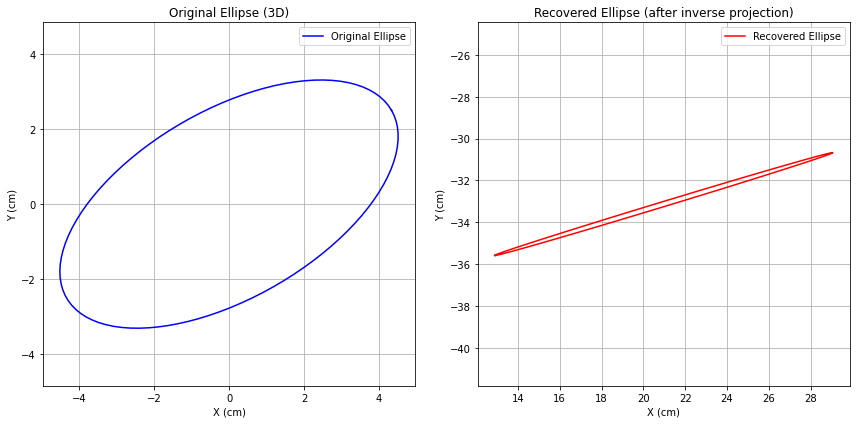

In [ ]:
###Possible solution??? to implement camera x and y rotations. \
# To transform ellipse as if looked through the Z normal, no rotations:


import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Define Ellipse Parameters
# -------------------------------
phi = np.radians(30)  # Ellipse orientation (radians)
w = 10  # Width of ellipse in cm
h = 5   # Height of ellipse in cm
xc, yc, zc = 0, 0, 0  # Ellipse center

# Camera Rotation Angles (in radians)
theta_x = np.radians(-51)  # Pitch (X-axis rotation)
theta_y = np.radians(-13)  # Yaw (Y-axis rotation)
theta_z = np.radians(90)   # Roll (Z-axis rotation)

# Camera Position
x_cam, y_cam, z_cam = 20, 10, 30

# Known real-world size per pixel (cm per pixel)
s = 0.05  # Example: 1 pixel = 0.05 cm

# -------------------------------
# Generate the 3D Ellipse
# -------------------------------
t = np.linspace(0, 2 * np.pi, 100)  # Parameter for ellipse
X = xc + (w / 2) * np.cos(t) * np.cos(phi) - (h / 2) * np.sin(t) * np.sin(phi)
Y = yc + (w / 2) * np.cos(t) * np.sin(phi) + (h / 2) * np.sin(t) * np.cos(phi)
Z = zc * np.ones_like(t)  # Assume the ellipse is in the XY plane

# -------------------------------
# Apply 3D Rotation to Align with Camera
# -------------------------------
# Rotation Matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta_x), -np.sin(theta_x)],
               [0, np.sin(theta_x), np.cos(theta_x)]])
Ry = np.array([[np.cos(theta_y), 0, np.sin(theta_y)],
               [0, 1, 0],
               [-np.sin(theta_y), 0, np.cos(theta_y)]])
Rz = np.array([[np.cos(theta_z), -np.sin(theta_z), 0],
               [np.sin(theta_z), np.cos(theta_z), 0],
               [0, 0, 1]])

# Full Rotation Matrix (Z * Y * X)
R = np.dot(np.dot(Rz, Ry), Rx)

# Apply Rotation
rotated_coords = np.dot(R, np.array([X - xc, Y - yc, Z - zc]))

Xr = rotated_coords[0, :] + xc
Yr = rotated_coords[1, :] + yc
Zr = rotated_coords[2, :] + zc

# -------------------------------
# Perspective Projection Using Known Pixel Size
# -------------------------------
X_pix = (Xr - x_cam) / (s * (Zr - z_cam))  # Convert X to pixel space
Y_pix = (Yr - y_cam) / (s * (Zr - z_cam))  # Convert Y to pixel space

# -------------------------------
# Inverse Perspective Projection (Recover 3D coordinates)
# -------------------------------
# Estimate depth Z (assumed for this example, can be calculated based on scene)
Z_est = 50  # Estimate depth (in cm)

# Convert pixel coordinates to world coordinates using the inverse projection
X_world = X_pix * s * Z_est + x_cam
Y_world = Y_pix * s * Z_est + y_cam
Z_world = np.full_like(X_pix, Z_est)  # Constant depth assumption

# -------------------------------
# Inverse Camera Rotation
# -------------------------------
# Inverse Rotation Matrix (transpose of R)
R_inv = np.transpose(R)

# Apply inverse rotation to the world coordinates
world_coords = np.dot(R_inv, np.array([X_world - x_cam, Y_world - y_cam, Z_world - z_cam]))

X_world_rot = world_coords[0, :] + xc
Y_world_rot = world_coords[1, :] + yc
Z_world_rot = world_coords[2, :] + zc

# -------------------------------
# Estimate Ellipse Parameters (Width, Height, Orientation)
# -------------------------------
# Width and Height: Compute the range of X and Y coordinates
ellipse_width = np.max(X_world_rot) - np.min(X_world_rot)
ellipse_height = np.max(Y_world_rot) - np.min(Y_world_rot)

# Orientation: Calculate angle of the major axis (principal axis of ellipse)
cov_matrix = np.cov(X_world_rot, Y_world_rot)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
major_axis = eigenvectors[:, np.argmax(eigenvalues)]

# Orientation angle (relative to X axis)
orientation_angle = np.arctan2(major_axis[1], major_axis[0])

# Convert to degrees
orientation_angle_deg = np.degrees(orientation_angle)

# -------------------------------
# Output Results
# -------------------------------
print(f"Estimated Ellipse Parameters:")
print(f"Width: {ellipse_width} cm")
print(f"Height: {ellipse_height} cm")
print(f"Orientation: {orientation_angle_deg} degrees")

# -------------------------------
# Plot Results (Before and After)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original 3D ellipse
axs[0].plot(X, Y, 'b', label='Original Ellipse')
axs[0].set_title("Original Ellipse (3D)")
axs[0].axis('equal')
axs[0].grid(True)
axs[0].set_xlabel('X (cm)')
axs[0].set_ylabel('Y (cm)')
axs[0].legend()

# Plot the recovered ellipse (projected to 3D space)
axs[1].plot(X_world_rot, Y_world_rot, 'r', label='Recovered Ellipse')
axs[1].set_title("Recovered Ellipse (after inverse projection)")
axs[1].axis('equal')
axs[1].grid(True)
axs[1].set_xlabel('X (cm)')
axs[1].set_ylabel('Y (cm)')
axs[1].legend()

plt.tight_layout()
plt.show()




x_pos_cm   -19.115394
y_pos_cm   -46.632123
dtype: float64